<a href="https://colab.research.google.com/github/Maram-Elsayed/Airbnb-New-User-Bookings-Kaggle/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Exploration**

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [0]:
# Read Data
data_train = pd.read_csv('drive/My Drive/airbnb/train_users_2.csv')
test= pd.read_csv('drive/My Drive/airbnb/test_users.csv')


In [0]:
data_train.age.replace('NaN', np.nan, inplace=True)


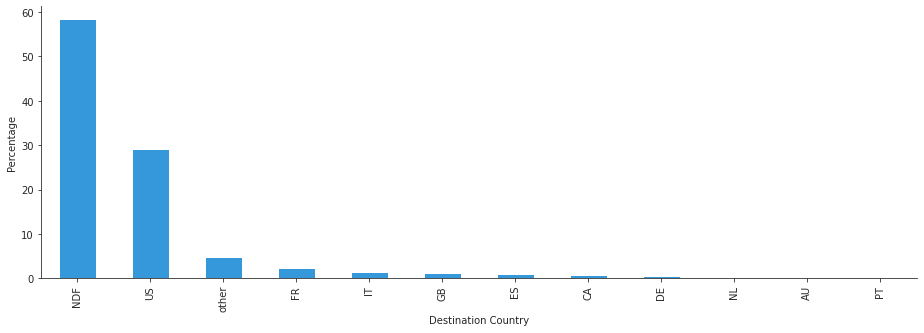

In [176]:
# Plot Destination Country Distribution 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 5)
destination_percentage = data_train.country_destination.value_counts() / data_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

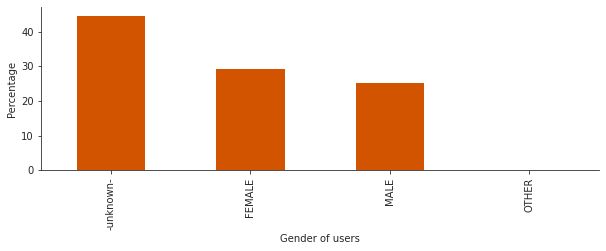

In [177]:
# Plot Users Gender Distribution 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 3)
gender_percentage = data_train.gender.value_counts() / data_train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#D35400')
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
display(data_train.gender.value_counts())
sns.despine()

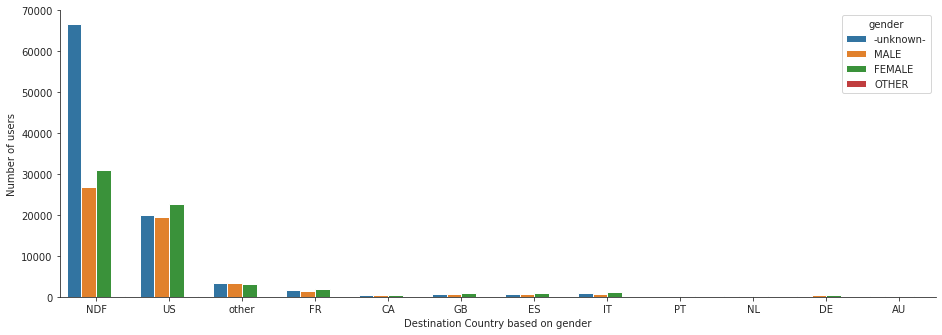

In [178]:
# Plot Gender Distribution with Different Destinations
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 5.27)
sns.countplot(x='country_destination', hue='gender',data=data_train)
plt.xlabel('Destination Country based on gender')
plt.ylabel('Number of users')
sns.despine()

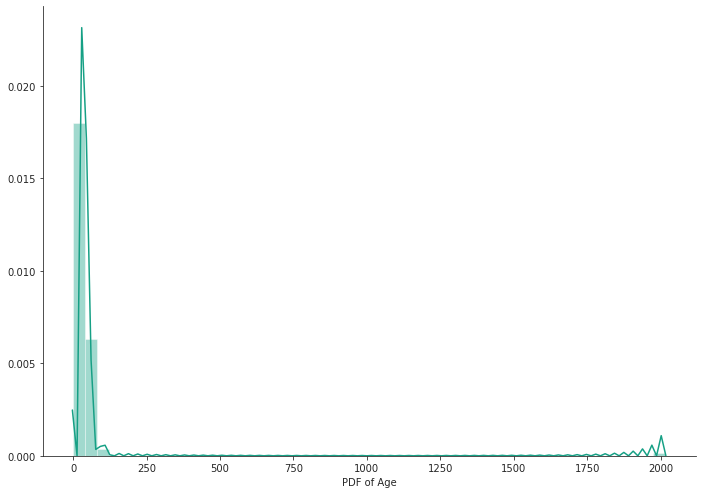

In [179]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(data_train.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()

Observation: 
  - Some age values are incorrect, like close to 2000
  - Mean age is around 36

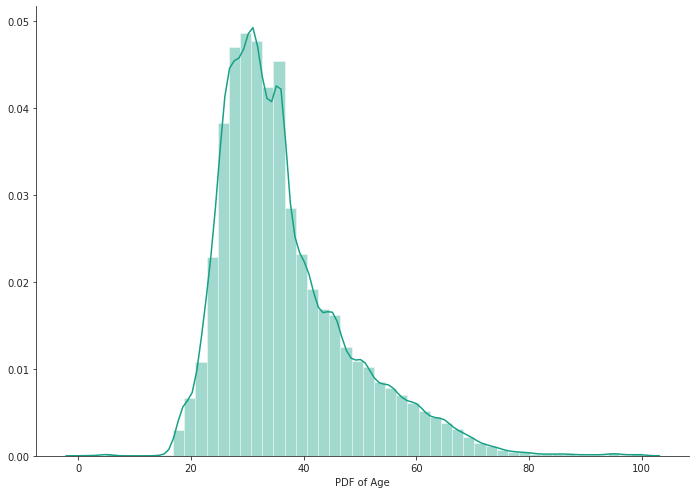

In [180]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_train['age']=data_train['age'].apply(lambda x : 36 if x>100 else x)
sns.distplot(data_train.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()

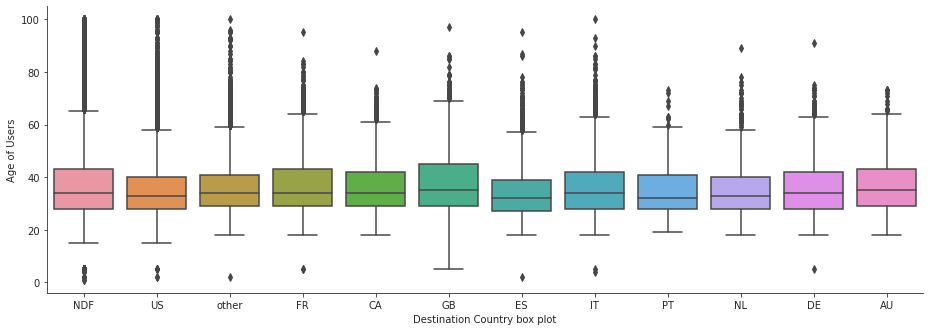

In [181]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 5.27)
sns.boxplot(y='age' , x='country_destination',data=data_train)
plt.xlabel('Destination Country box plot')
plt.ylabel('Age of Users')
sns.despine()

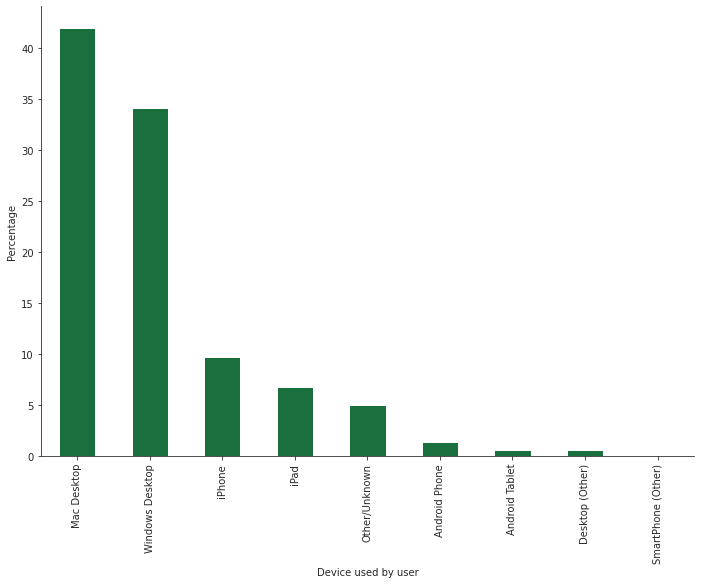

In [182]:
# Plot Device Percentage user
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = data_train.first_device_type.value_counts() / data_train.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

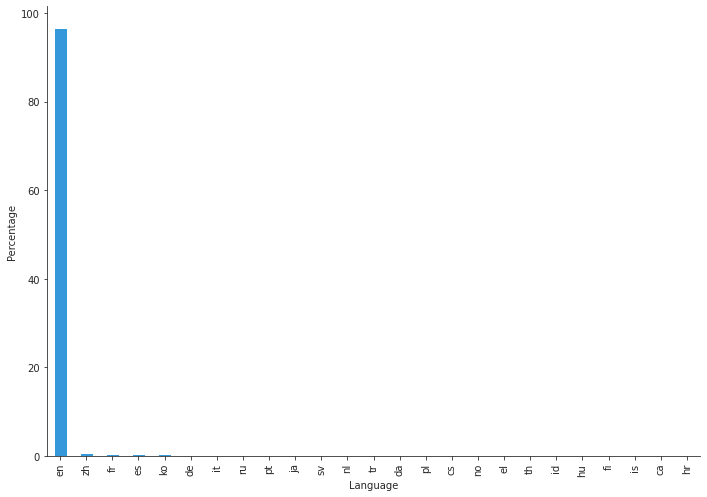

In [183]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = data_train.language.value_counts() / data_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Language')
plt.ylabel('Percentage')
sns.despine()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

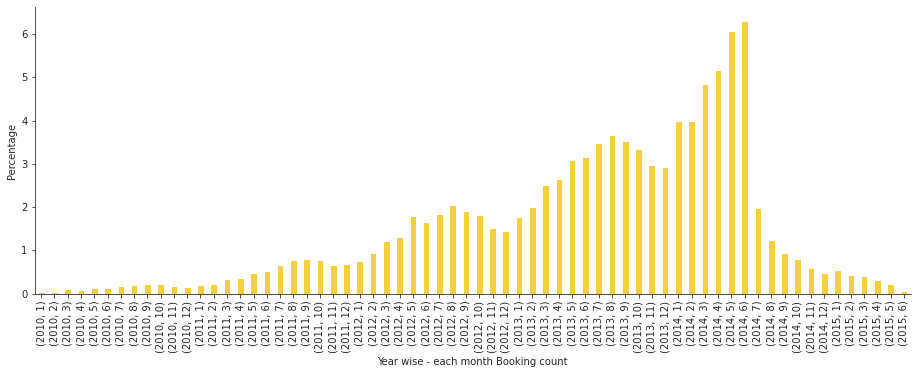

In [163]:
# First date booking distribution
booked=data_train[data_train['country_destination']!='NDF']

booked['first_booking_year'] = pd.to_numeric(booked['date_first_booking'].str[0:4])
booked['first_booking_month'] =pd.to_numeric(booked['date_first_booking'].str[5:7])
booked['first_booking_day'] =pd.to_datetime(booked['date_first_booking']).dt.day_name()

# Plot Year wise - each month Booking count for first time booking
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 5.27)
destination_percentage = booked.groupby(['first_booking_year','first_booking_month']).id.count() / booked.shape[0] * 100
destination_percentage.plot(kind='bar',color="#F4D03F")
plt.xlabel('Year wise - each month Booking count')
plt.ylabel('Percentage')
sns.despine()




Text(0, 0.5, 'Percentage')

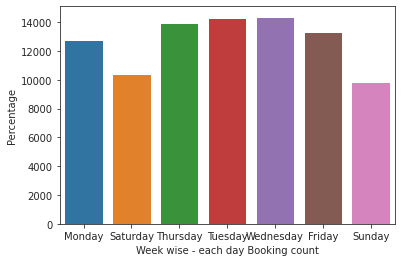

In [184]:
# Plot week day count for first time booking
sns.countplot(x='first_booking_day',data=booked)
plt.xlabel('Week wise - each day Booking count')
plt.ylabel('Percentage')

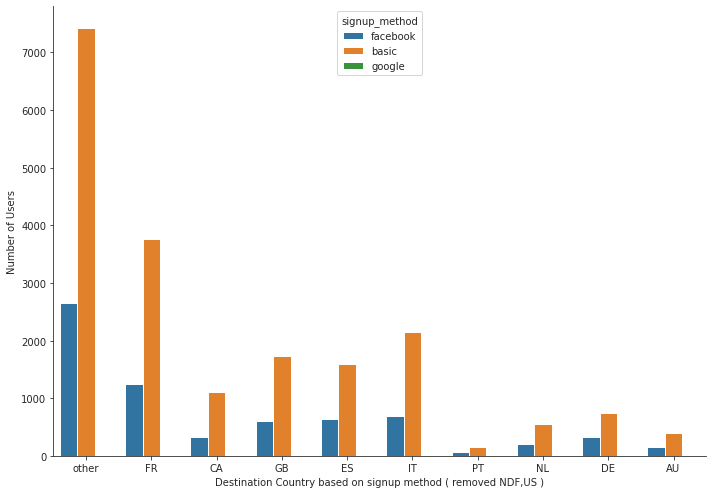

In [186]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_method',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup method ( removed NDF,US )')
plt.ylabel('Number of Users')
sns.despine()

In [0]:
# Set -unknown- gender to null
data_train.gender.replace('-unknown-',np.nan, inplace=True)

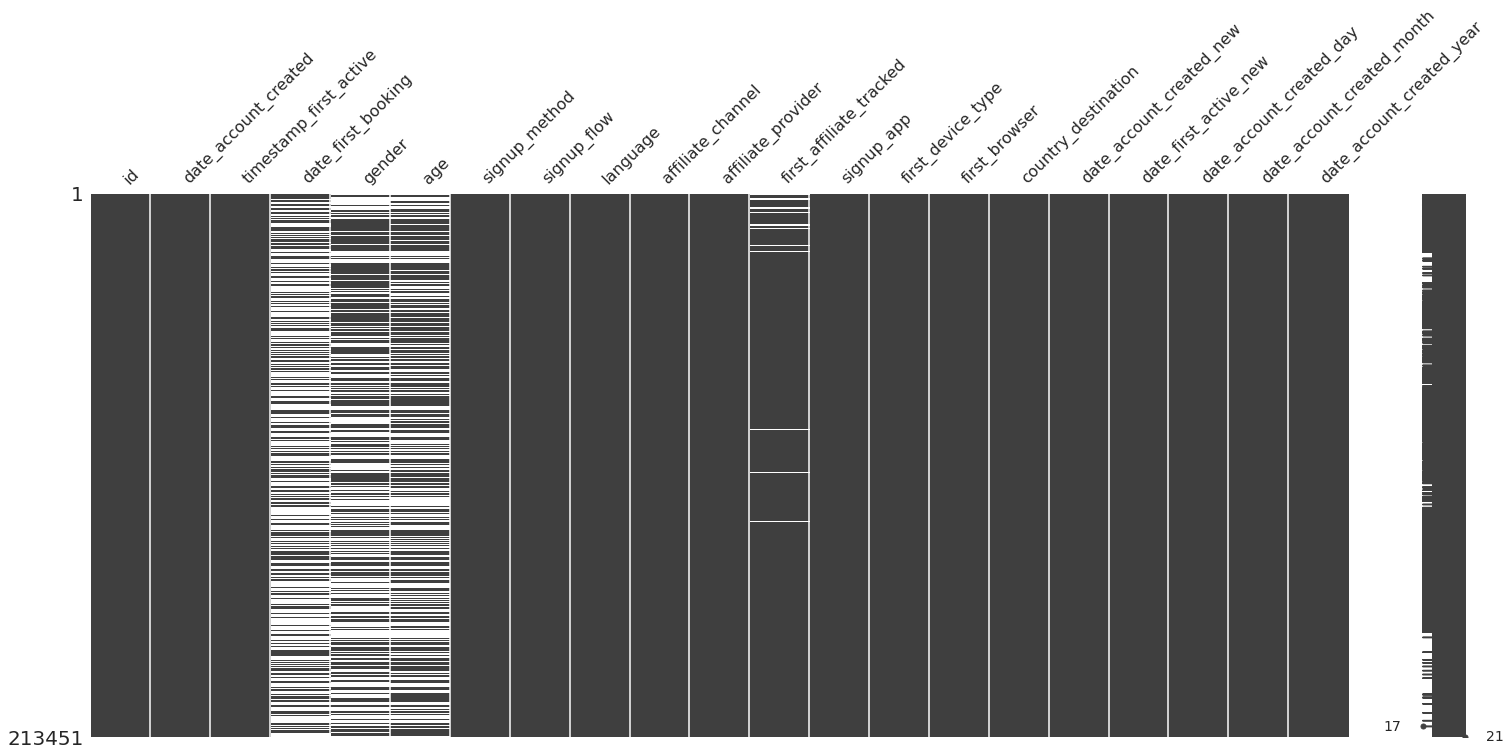

In [169]:
import missingno as msno
msno.matrix(data_train)